# Report: Evaluation

```{versionadded} 0.11.4
```

We use different metrics to estimate a machine learning model's performance, and to understand its strengths and weaknesses.

In this guide, we'll show you how to easily generate a report with everything your need in one place using our [`evaluate_models`](../api/plot.rst).

We'll use the heart disease dataset, you can download it from <a href="https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data" target="_blank">here</a>.

## Download the data

In [1]:
import urllib.request
import pandas as pd

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/sharmaroshan/"
    + "Heart-UCI-Dataset/master/heart.csv",
    filename="heart.csv",
)

data = pd.read_csv("heart.csv")

## Prepare the data

In [2]:
from sklearn.model_selection import train_test_split

column = "fbs"
X = data.drop(column, axis=1)
y = data[column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2023
)

## Define the model

In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)

## Evaluate the model

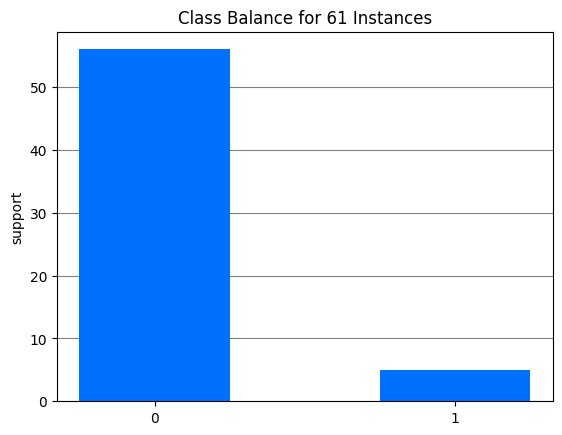

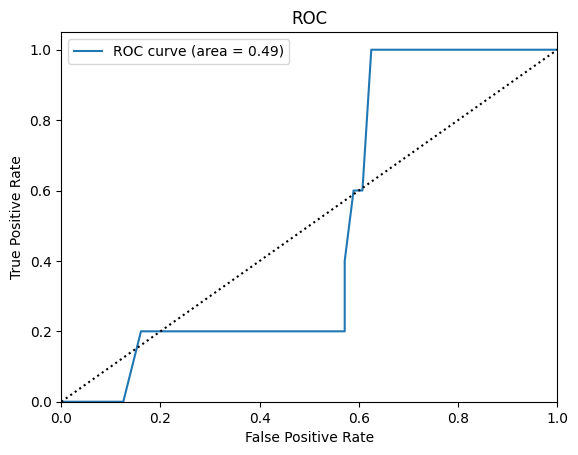

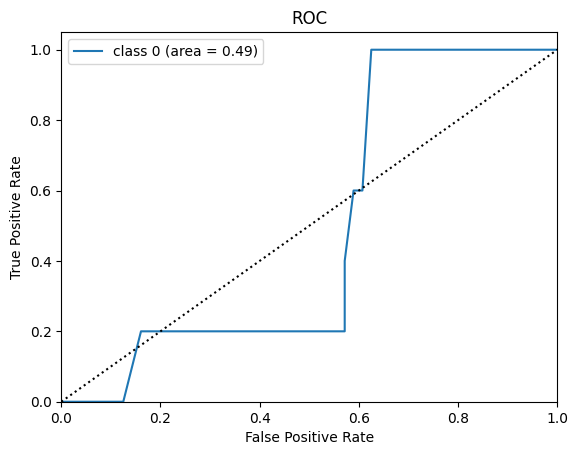

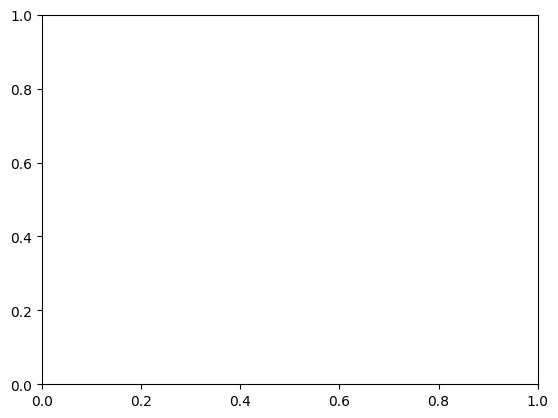

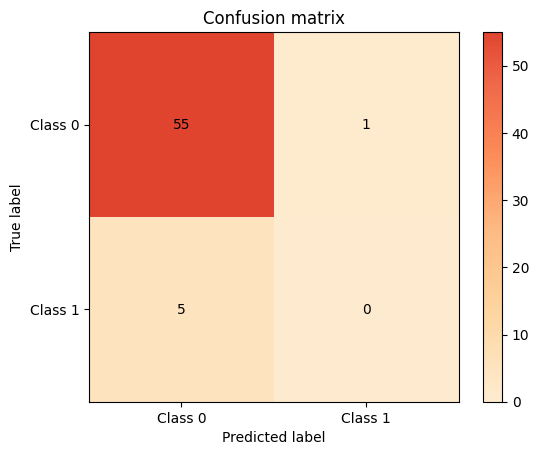

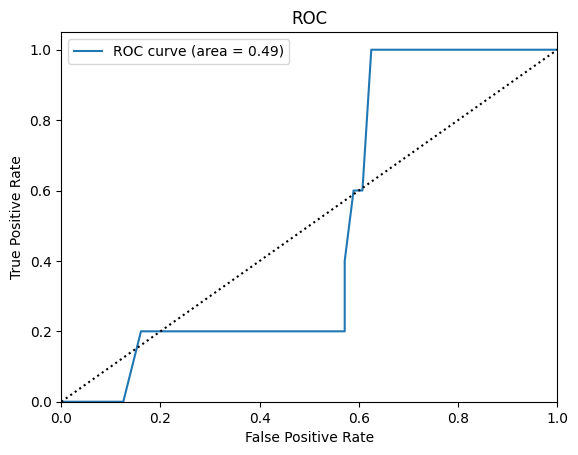

In [4]:
from sklearn_evaluation.report import evaluate_model

report = evaluate_model(model, y_test, y_pred, y_score=y_score)

## Embed the report

In [5]:
report

## Save report as HTML

In [6]:
report.save("report.html")